In [2]:

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 

In [4]:
data_df = pd.read_csv("diamonds.csv")
data_df.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
25810,25811,1.80,Ideal,F,SI1,61.9,56.0,14814,7.78,7.87,4.84
47142,47143,0.64,Ideal,H,VS2,62.3,54.0,1831,5.52,5.55,3.44
4918,4919,0.70,Ideal,G,VVS2,61.6,57.0,3725,5.74,5.71,3.53
29630,29631,0.31,Very Good,I,VS2,61.5,55.0,442,4.34,4.36,2.68
26877,26878,1.40,Ideal,F,VVS1,61.9,57.0,16808,7.20,7.14,4.44
28166,28167,0.32,Ideal,G,VS1,62.0,55.0,665,4.43,4.44,2.75
35226,35227,0.33,Ideal,F,VVS1,61.7,54.0,893,4.46,4.49,2.76
20469,20470,1.03,Ideal,E,VVS2,61.9,57.0,8811,6.46,6.50,4.01
42036,42037,0.53,Very Good,F,SI1,62.9,57.0,1268,5.15,5.18,3.25
14074,14075,1.03,Ideal,E,SI1,62.0,53.0,5710,6.50,6.47,4.02


# intuition
#### Based on intuition, carat seems to be the most important variable for predicting the price 

### Data analysis

In [5]:
# Checking for missing values and categorical variables in the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB



##### There are 53940 non-null values in all the attributes thus no missing values.
##### Datatype of features 'cut', 'color' & 'clarity' is "object" which needs to be converted into numerical variable (will be done in data preprocessing) before we feed the data to algorithms. 

## Evaluating categorical features

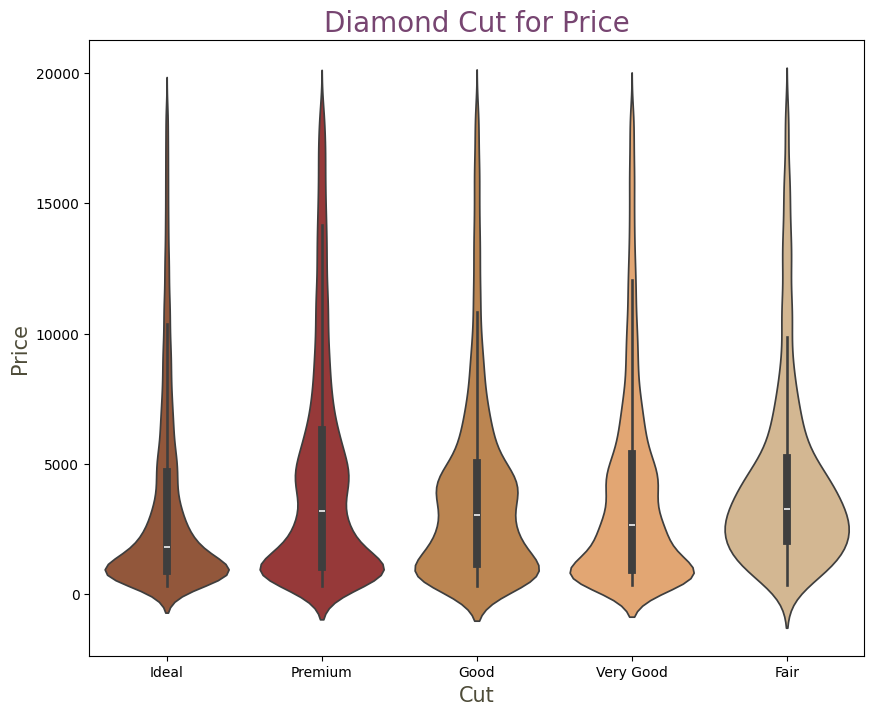

In [6]:
plt.figure(figsize=(10,8))
cols = ["#A0522D","#A52A2A","#CD853F","#F4A460","#DEB887"]
ax = sns.violinplot(x="cut",y="price", data=data_df, palette=cols,scale= "count")
ax.set_title("Diamond Cut for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Cut", color="#4e4c39", fontsize = 15)
plt.show()

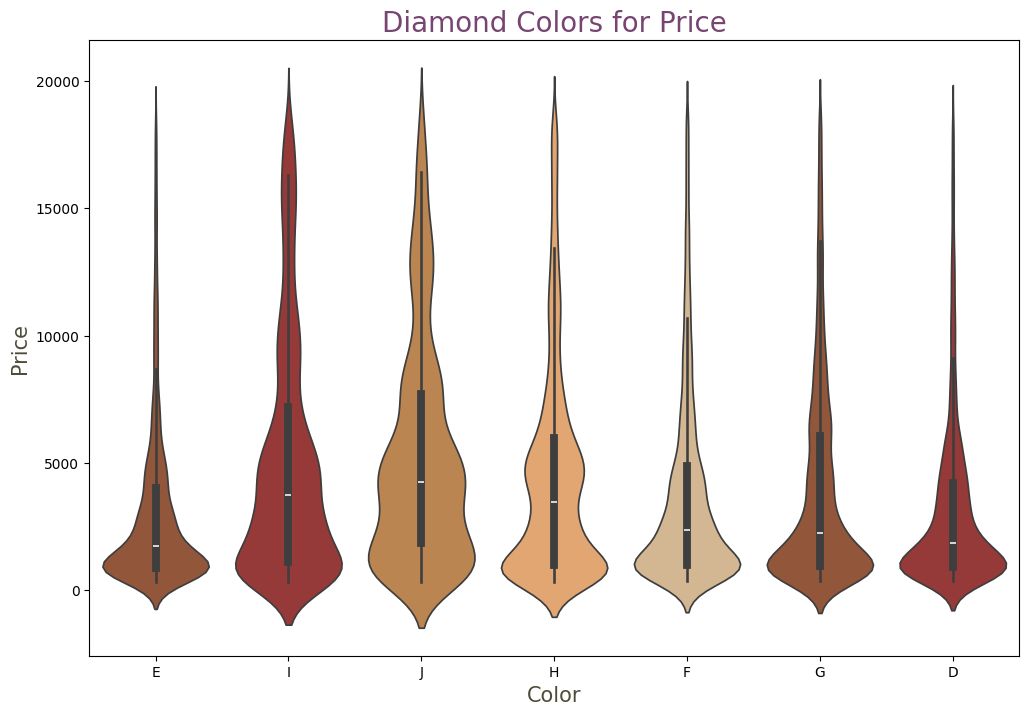

In [7]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="color",y="price", data=data_df, palette=cols,scale= "count")
ax.set_title("Diamond Colors for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Color", color="#4e4c39", fontsize = 15)
plt.show()

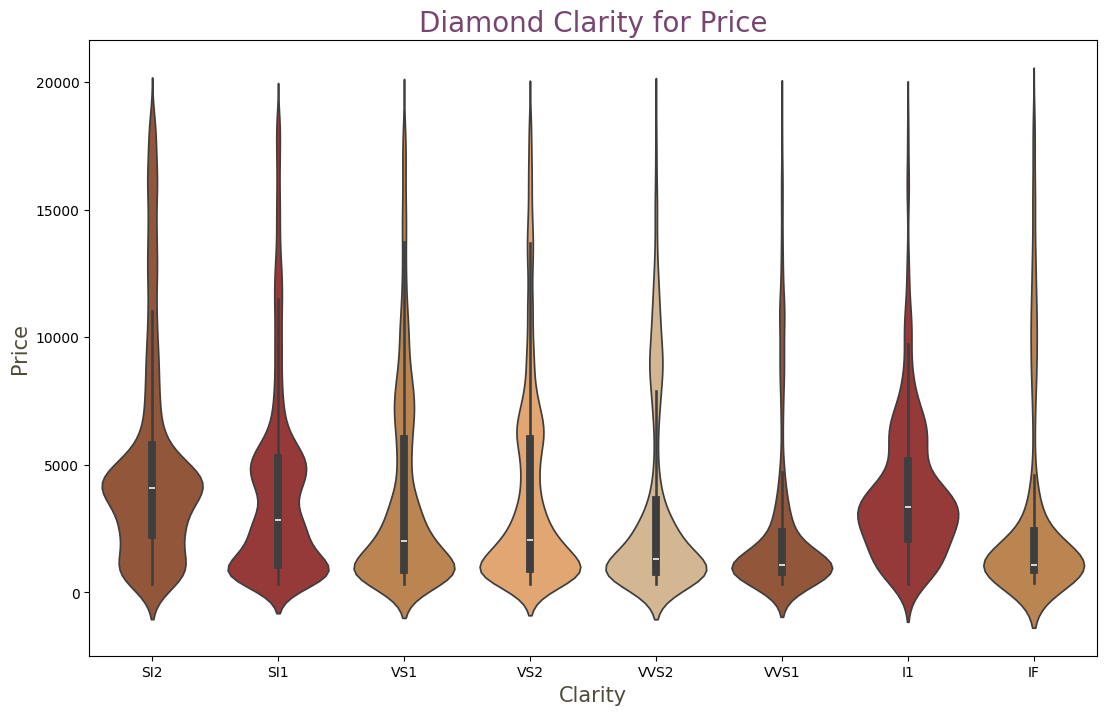

In [8]:
plt.figure(figsize=(13,8))
ax = sns.violinplot(x="clarity",y="price", data=data_df, palette=cols,scale= "count")
ax.set_title("Diamond Clarity for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Clarity", color="#4e4c39", fontsize = 15)
plt.show()


##### "Ideal" diamond cuts are the most in the number while the "Fair" is the least. More diamonds of all of such cuts for lower price category. 
##### "J" color diamond which is worst are most rare however, "H" and "G" are more in number eventhough they're of inferior quality as well.
##### Diamonds of "IF" clarity which is best as well as "I1" which is worst are very rare and rest are mostly of in-between clarities. 

### Descriptive Statistics

In [9]:
# Doing Univariate Analysis for statistical description and understanding of dispersion of data
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


Note:
##### "Price" as expected is right skewed, having more number of data points in left 
##### Under dimensional features of 'x', 'y' & 'z' - min value is 0 thus making such datapoints either a 1D or 2D diamond object which doesn't make much sense - so needs either to be imputed with appropriate value or dropped altogether.

## PairPlot

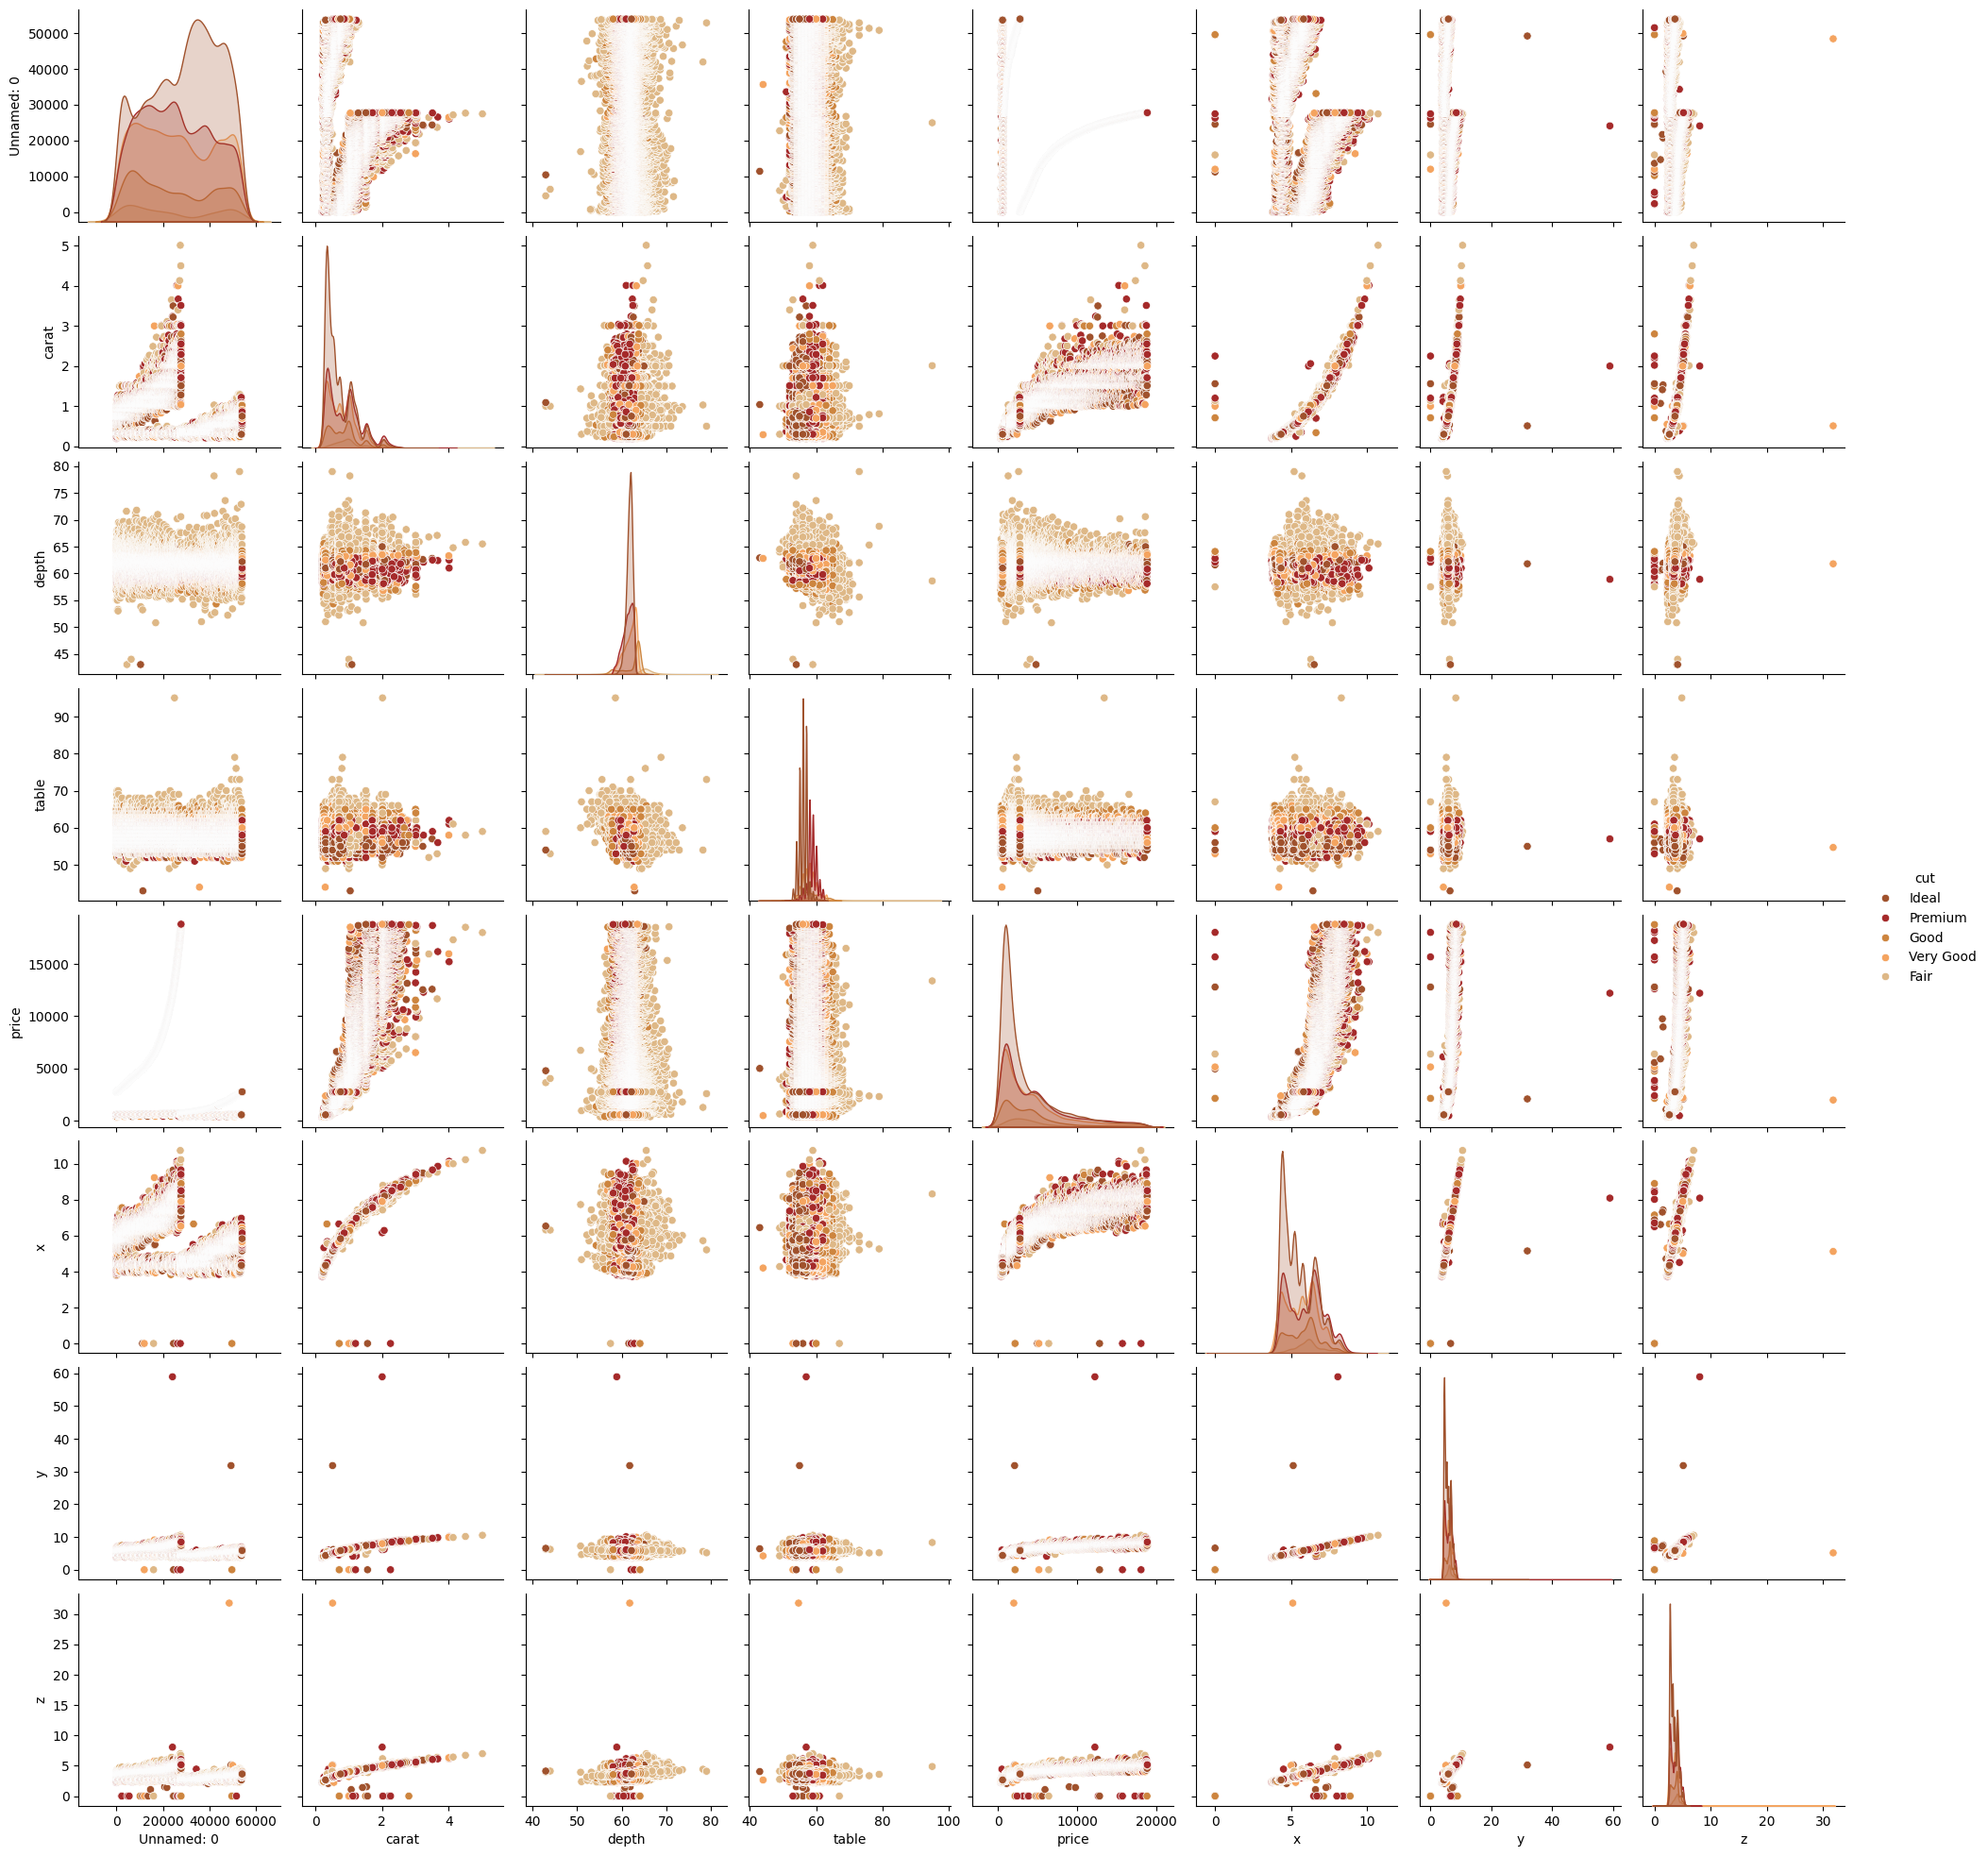

In [10]:
ax = sns.pairplot(data_df, hue= "cut", palette = cols)

## Note:
##### There's a useless feature "unnamed" which is just an index and needs to be eliminated altogether. 
##### Features are having datapoints that are far from the rest of the dataset (outliers) which needs to be dealth with or else would affect our model.
##### "y" and "z" have some dimensional outliers in our dataset that needs to be eliminated.
##### Features "depth" & "table" should be capped after we confirm by examining the Line plots.

### Checking for Potential Outliers

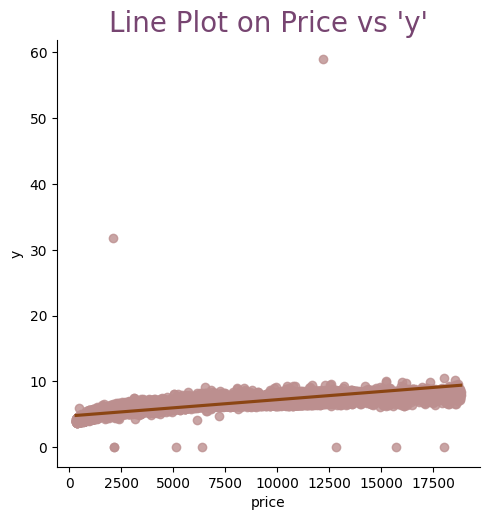

In [11]:
lm = sns.lmplot(x="price", y="y", data=data_df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'y'", color="#774571", fontsize = 20)
plt.show()

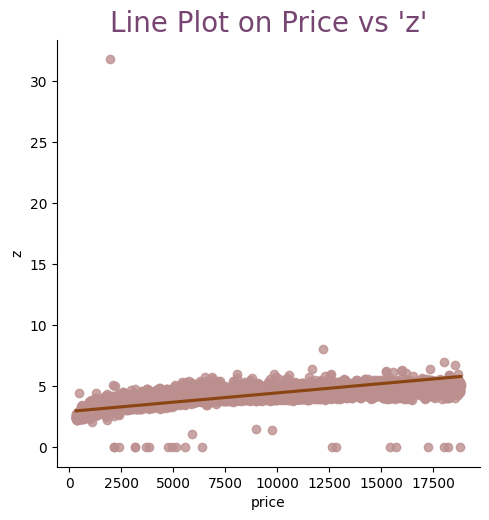

In [12]:
lm = sns.lmplot(x="price", y="z", data=data_df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'z'", color="#774571", fontsize = 20)
plt.show()

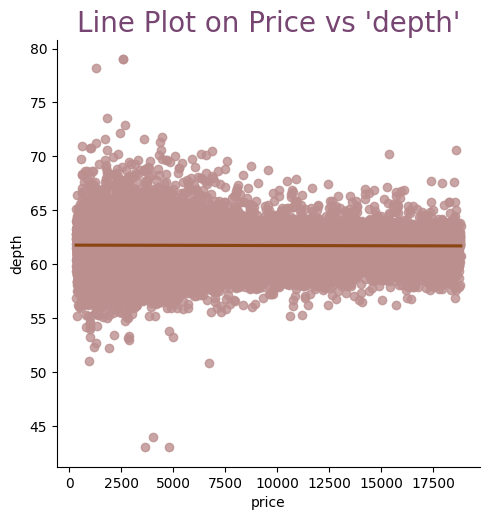

In [13]:
lm = sns.lmplot(x="price", y="depth", data=data_df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'depth'", color="#774571", fontsize = 20)
plt.show()

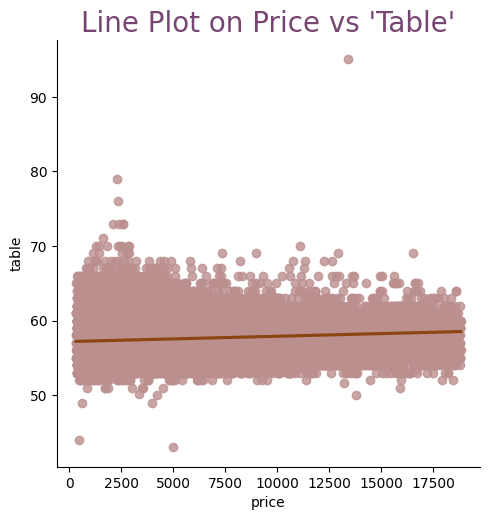

In [14]:
lm = sns.lmplot(x="price", y="table", data=data_df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'Table'", color="#774571", fontsize = 20)
plt.show()

Note:
##### In the Line plots of above features, we can easily spot the outliers which we'll drop before feeding the data to the algorithm.


## DATA PREPROCESSING

### Data Cleaning

In [15]:
# Removing the feature "Unnamed"
data_df = data_df.drop(["Unnamed: 0"], axis=1)
data_df.shape

(53940, 10)

In [16]:
# Removing the datapoints having min 0 value in either x, y or z features 
data_df = data_df.drop(data_df[data_df["x"]==0].index)
data_df = data_df.drop(data_df[data_df["y"]==0].index)
data_df = data_df.drop(data_df[data_df["z"]==0].index)
data_df.shape

(53920, 10)

### Removing Outliers

In [17]:
# Dropping the outliers (since we have huge dataset) by defining appropriate measures across features 
data_df = data_df[(data_df["depth"]<75)&(data_df["depth"]>45)]
data_df = data_df[(data_df["table"]<80)&(data_df["table"]>40)]
data_df = data_df[(data_df["x"]<40)]
data_df = data_df[(data_df["y"]<40)]
data_df = data_df[(data_df["z"]<40)&(data_df["z"]>2)]
data_df.shape 

(53909, 10)

### Encoding Categorical Variables

In [18]:
# Making a copy to keep original data in its form intact
data1 = data_df.copy()

# Applying label encoder to columns with categorical data
columns = ['cut','color','clarity']
label_encoder = LabelEncoder()
for col in columns:
    data1[col] = label_encoder.fit_transform(data1[col])
data1.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000
mean,0.797617,2.553396,2.593964,3.835575,61.749743,57.455852,3930.513680,5.731441,5.733764,3.539994
std,0.473759,1.027444,1.701283,1.724540,1.420093,2.226169,3987.145802,1.119369,1.116891,0.702085
min,0.200000,0.000000,0.000000,0.000000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,73.600000,79.000000,18823.000000,10.740000,31.800000,31.800000


### Note: 
##### As categorical features have been converted into numerical columns, we are getting 5-point summary along with count, mean & std for them as well. 
##### Now, we may analyze correlation matrix after getting done with pre-processing for possible feature selection in order to make our dataset more cleaner, optimal before we feed it into algorithm.

### Correlation Matrix

<Axes: >

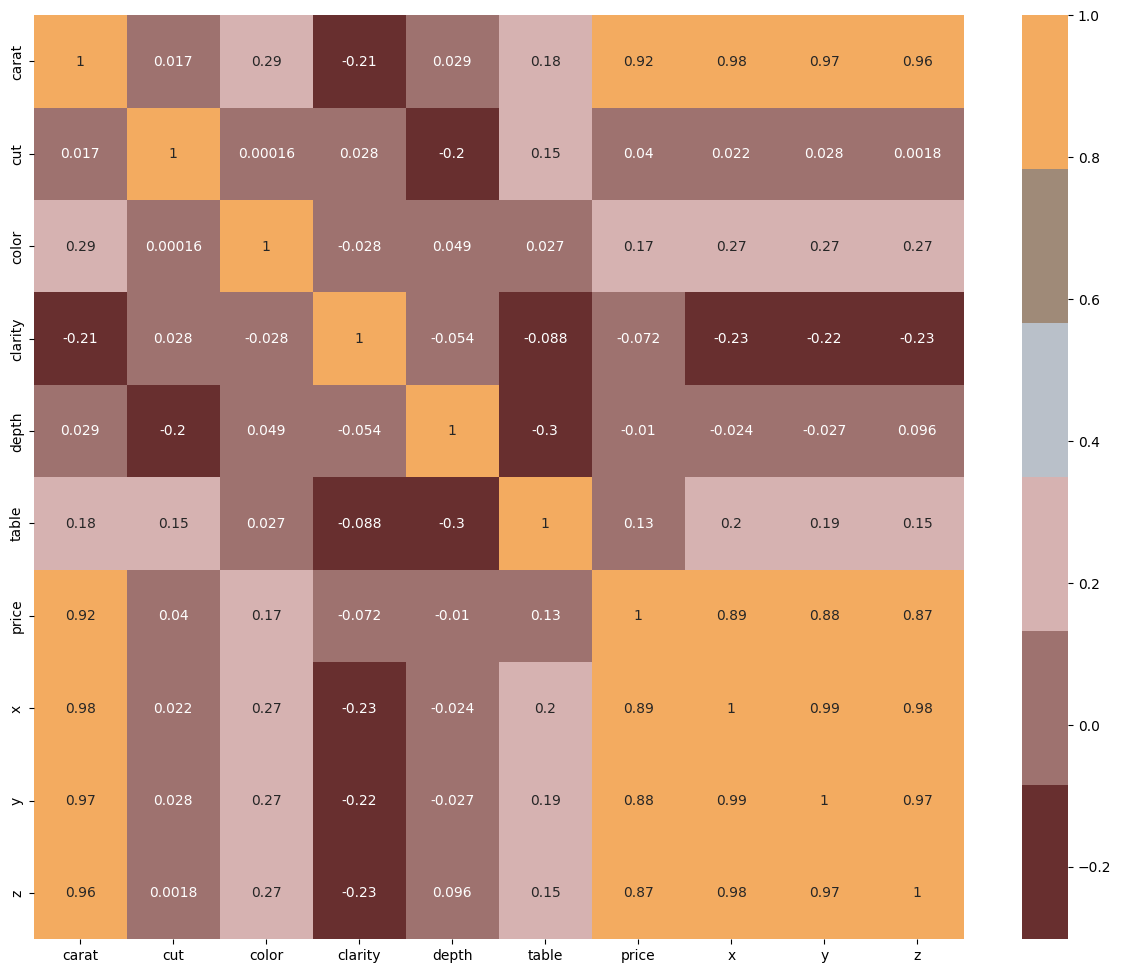

In [19]:
# Examining correlation matrix using heatmap
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
cols = (["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
corrmat= data1.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,cmap=cols,annot=True)

### Note:
##### Features "carat", "x", "y", "z" are highly correlated to our target variable, price. 
##### Features "cut", "clarity", "depth" are very low correlated (<|0.1|) thus may be removed though due to presence of only few selected features, we won't be doing that.

## MODEL BUILDING

We will try to test various model in parallel, using linear regression and xgboost as the basic model and best model

In [20]:
# Defining the independent and dependent variables
X= data1.drop(["price"],axis =1)
y= data1["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=25)

In [21]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr",LinearRegression())])

pipeline_xgb=Pipeline([("scalar6",StandardScaler()),
                     ("xgb",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression", 1: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [22]:
# Extract the trained Linear Regression model from the pipeline
lr_model = pipeline_lr.named_steps['lr']

# Get the coefficients from the Linear Regression model
coefficients = lr_model.coef_

# Print the coefficients
print(coefficients)


[ 5331.15666015    64.33638436  -459.92206778   491.39309874
  -223.65338824  -205.48581033 -1725.23003861   354.98251522
   -43.38485838]


## note
#### the magnitude is gigantic, and the signs is changing depending on the variables
### no coefficient are contradictory

In [23]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=12)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

LinearRegression: 1383.854012 


XGBRegressor: 548.346850 


In [24]:
# Model prediction on test data with XGBClassifier which gave us the least RMSE 
pred = pipeline_xgb.predict(X_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

R^2: 0.9821291192884176
Adjusted R^2: 0.9821141881775372


Accuracy : 98 % for the best model

It is very precise ! so, we can take it to production, in order to put price on diamond automatically


## SHAP ANALYSIS

In [25]:
import shap

# Extract the XGBoost model from the pipeline
xgb_model = pipeline_xgb.named_steps['xgb']

In [26]:
# Create a SHAP Explainer
explainer = shap.Explainer(xgb_model)

In [27]:
# Apply scaling to X_test as done during training
X_test_scaled = pipeline_xgb.named_steps['scalar6'].transform(X_test)

# Calculate SHAP values for the scaled test dataset
shap_values = explainer.shap_values(X_test_scaled)

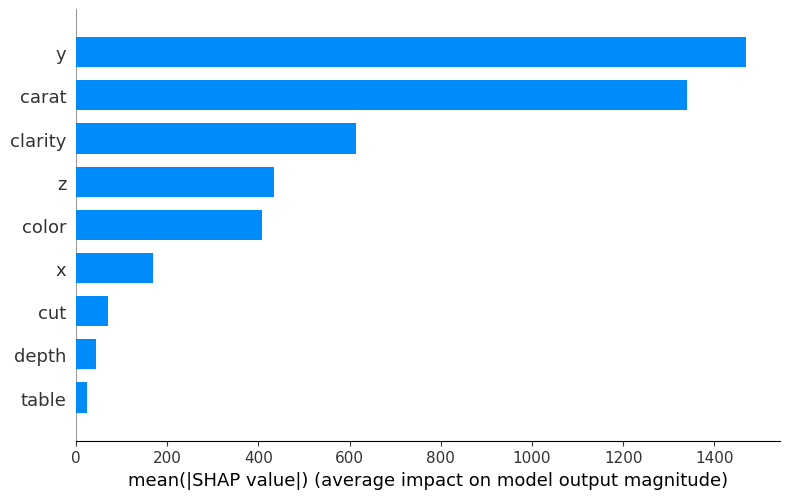

In [28]:
# SHAP Summary Plot for feature importance
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns, plot_type="bar")

**We can see the the most impactful features are y(diamond width) and carat.**

### Comparaisong between Linear Regression and XGBoost feature importance

In [29]:
# Extract the trained Linear Regression model from the pipeline
lr_model = pipeline_lr.named_steps['lr']

# Get the coefficients from the Linear Regression model
lr_coefs = lr_model.coef_

# Put the coefficients into a Series for easier comparison
importance_lr = pd.Series(lr_coefs, index=X.columns)

# Now let's sort the features by their coefficients to see which are considered most important
importance_lr_sorted = importance_lr.abs().sort_values(ascending=False)


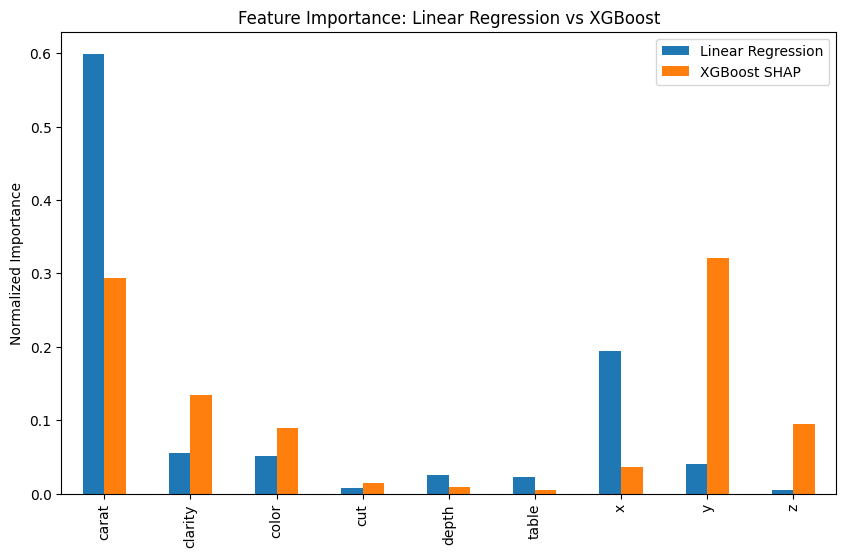

In [30]:
# Sum the absolute SHAP values for each feature to get an overall importance measure
shap_sum = np.abs(shap_values).mean(axis=0)
importance_shap = pd.Series(shap_sum, index=X.columns).sort_values(ascending=False)

# Normalize the SHAP values (optional)
importance_shap_normalized = importance_shap / importance_shap.sum()

# Normalize the Linear Regression coefficients (optional)
importance_lr_normalized = importance_lr_sorted / importance_lr_sorted.sum()

# Create a DataFrame for easier plotting
comparison_df = pd.DataFrame({
    'Linear Regression': importance_lr_normalized,
    'XGBoost SHAP': importance_shap_normalized
})

# Plot comparison
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance: Linear Regression vs XGBoost')
plt.ylabel('Normalized Importance')
plt.show()


- **Carat:** Both models agree that 'carat' is the most important feature, with the highest normalized importance score. This is consistent with domain knowledge, as the carat weight of a diamond is a key determinant of its price.

- **Clarity and Color:** For 'clarity', there's a notable difference in importance between the two models, with XGBoost assigning more importance to this feature compared to Linear Regression. This may suggest that 'clarity' has a non-linear relationship with the price that XGBoost is able to capture. 'Color' also shows a similar trend, though the difference is less pronounced.

- **Cut, Depth, and Table:** These features have relatively low importance in both models, but 'cut' and 'table' are somewhat more important in the Linear Regression model than in the XGBoost model. 'Depth' shows minimal importance across both models, implying it has a less significant relationship with the price.

- **Dimensions (x, y, z):** The dimensions of the diamond, represented by 'x', 'y', and 'z', show interesting differences. 'y' is given substantial importance by XGBoost, implying that the vertical dimension of the diamond has a complex relationship with the diamond's price that XGBoost picks up on. 'x' and 'z' are less important across both models, with 'z' being the least important.


In summary, this comparison reveals that while both models recognize 'carat' as the most significant predictor of diamond prices, there are differences in how they evaluate the importance of other attributes. XGBoost's ability to model non-linear relationships allows it to assign significance to features like 'clarity' and 'y', which Linear Regression may not capture as effectively due to its linear nature

**For a specific prediction, we use a force plot to visualize the contribution of each feature.**

In [31]:
# Initialize SHAP's javascript
shap.initjs()

# Then create the force plot for the first prediction
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], feature_names=X_test.columns)


In [32]:
# Then create the force plot for the second prediction
shap.force_plot(explainer.expected_value, shap_values[1,:], X_test.iloc[1,:], feature_names=X_test.columns)

In [33]:
# Then create the force plot for the third prediction
shap.force_plot(explainer.expected_value, shap_values[2,:], X_test.iloc[2,:], feature_names=X_test.columns)

**The beeswarm plot provides a global view of the impact of each feature across all samples.**

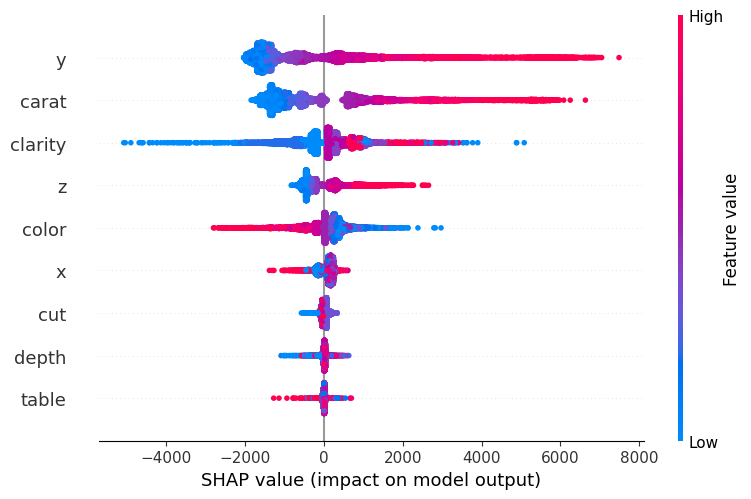

In [34]:
# Beeswarm plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns)

**We can see that a high value of y (diamond width) and carat have a strong positive impact on the predicted price, while a low value of clarity has a strong negative impact.**

**Dependence plots show the effect of a single feature across the value range, illustrating potential interactions with other features. We chose to plot a dependence plot for the carat feature**

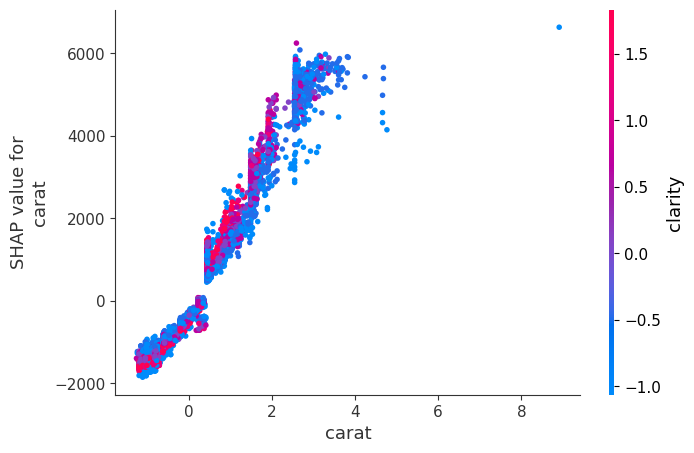

In [35]:
# Dependence plot for 'carat' feature
shap.dependence_plot('carat', shap_values, X_test_scaled, feature_names=X_test.columns)

Here's how we interpret this plot:

- **Carat and Price Relationship:** The plot shows a clear upward trend, indicating that as the carat weight of a diamond increases, its impact on the price also tends to increase. This suggests a positive correlation between carat weight and diamond price, which is intuitive given that larger diamonds are generally more valuable.

- **Non-linear Effect:** The curvature in the plot suggests a non-linear relationship between **carat** and **diamond price**. The impact on price increases at an increasing rate with carat size, which could indicate that the market places a premium on larger diamonds more than just their size would suggest.

- **Clarity Interaction:** The color gradient represents different levels of **clarity**. The variety in color spread across the plot suggests that **clarity** interacts with **carat** in determining the price. For instance, at lower carat values, a wider range of **clarity** can be seen, indicating that **clarity** has a varying influence on price for smaller diamonds. As carat size increases, the influence of **clarity** seems to concentrate, potentially indicating that for larger diamonds, **clarity** may become more consistently influential in price determination.

- **Data Density:** The density of the points also provides information. More densely packed areas of the plot indicate more common combinations of **carat** and **clarity** values in the dataset.

- **Potential Outliers:** There are a few points with very high SHAP values for certain carat weights. It could be interesting to investigate these specific data points further, as they might represent outlier diamonds with characteristics that are highly valued in the dataset.

In conclusion, the dependence plot for **carat** suggests that both **carat** and **clarity** are important factors in predicting diamond prices, with **carat** having a strong positive relationship with price and **clarity** potentially modulating this relationship. The interaction effect visible in the plot underscores the importance of considering both of these features together rather than in isolation.